In [1]:
from utils import *

import matplotlib.pyplot as plt 
import collections

In [2]:
db_models, benchmarks = load_database()
cacheasso_benchmarks = benchmarks['cacheasso_benchmarks']
cachesize_benchmarks_small = benchmarks['cachesize_benchmarks_small']
cachesize_benchmarks_large = benchmarks['cachesize_benchmarks_large']
tlb_benchmarks = benchmarks['tlb_benchmarks']
singleperf_benchmarks = benchmarks['singleperf_benchmarks']
cores = benchmarks['cores']
execution_times = benchmarks['execution_times']

In [3]:
csv_dict = load_csv()

[-]  Loading target data from CSV
[-]  Done loading target data from CSV


In [4]:
balance = False

In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

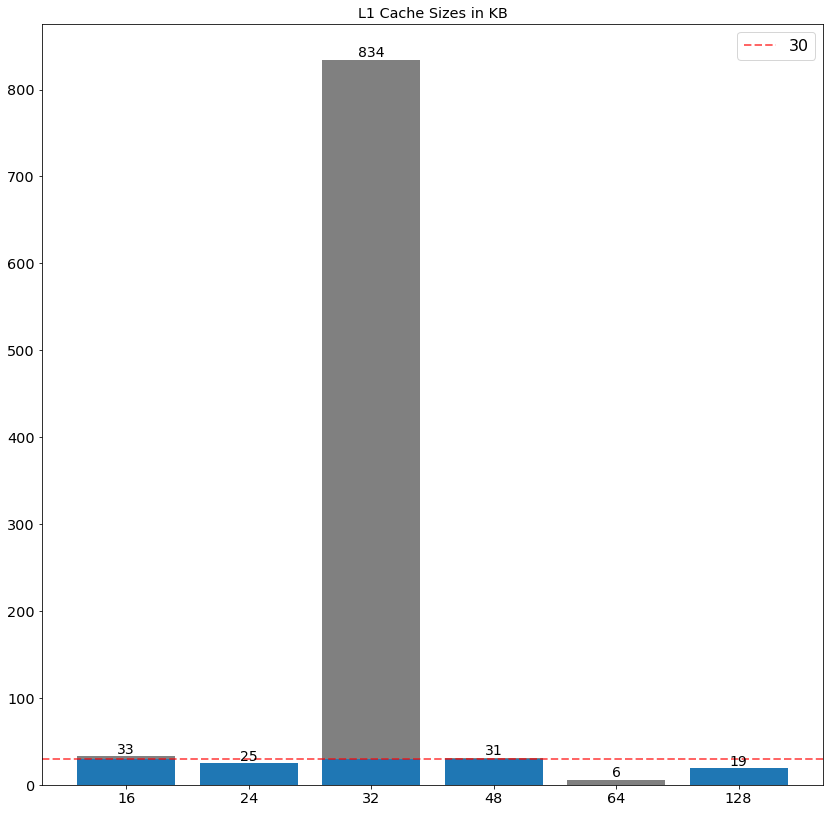

In [6]:
X_l1, y_l1 = prepare_l1(balance, db_models, cachesize_benchmarks_small, csv_dict['name'], csv_dict['rname'], csv_dict['l1'])
threshold = 30

counter = collections.Counter(y_l1)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('L1 Cache Sizes in KB')
plt.legend(fontsize=16)
plt.show()

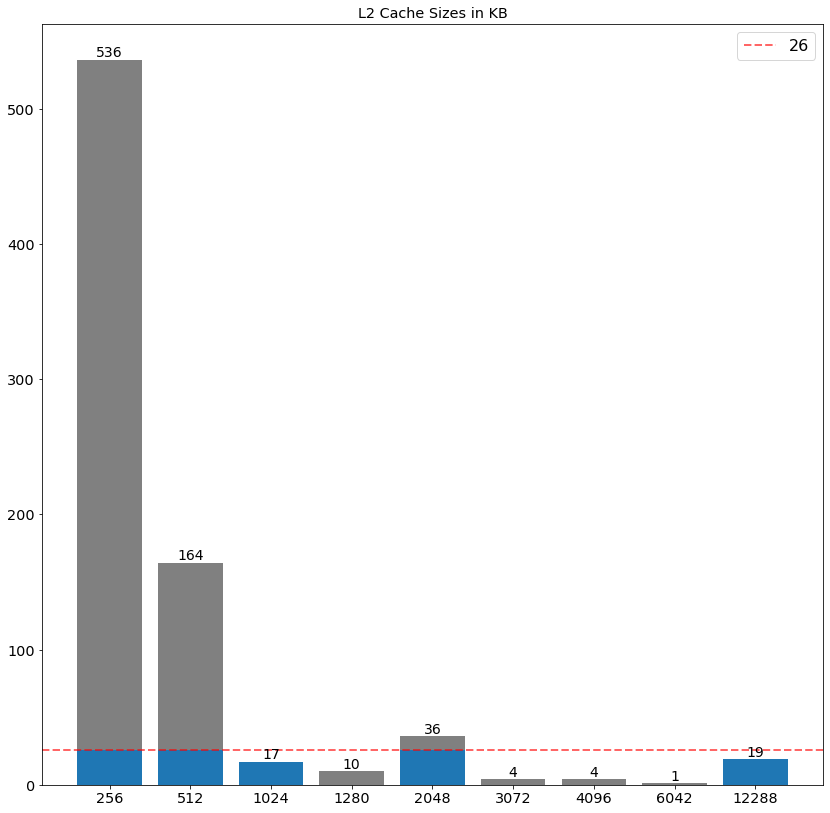

In [7]:
X_l2, y_l2large = prepare_l2(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, csv_dict['name'], csv_dict['rname'], csv_dict['l2'])
threshold = 26

counter = collections.Counter(y_l2large)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0', 'C0', 'C0', 'gray', 'C0', 'gray', 'gray', 'gray', 'C0'])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('L2 Cache Sizes in KB')
plt.legend(fontsize=16)
plt.show()

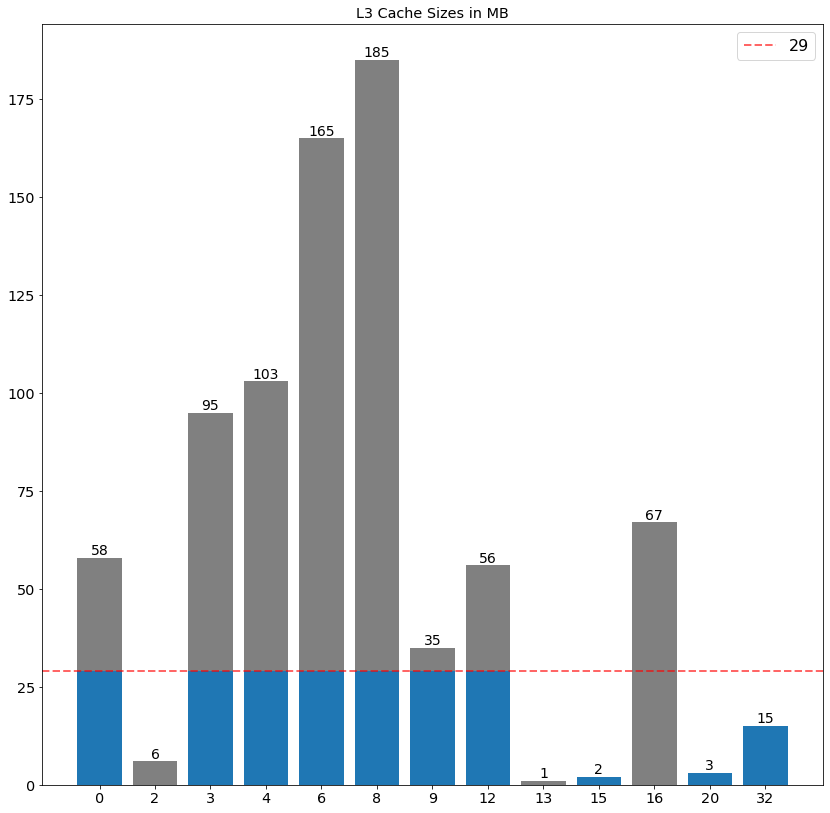

In [8]:
X_l3, y_l3 = prepare_l3(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, csv_dict['name'], csv_dict['rname'], csv_dict['l3'])
threshold = 29

counter = collections.Counter(y_l3)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0', 'gray', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'gray', 'C0', 'gray', 'C0'])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('L3 Cache Sizes in MB')
plt.legend(fontsize=16)
plt.show()

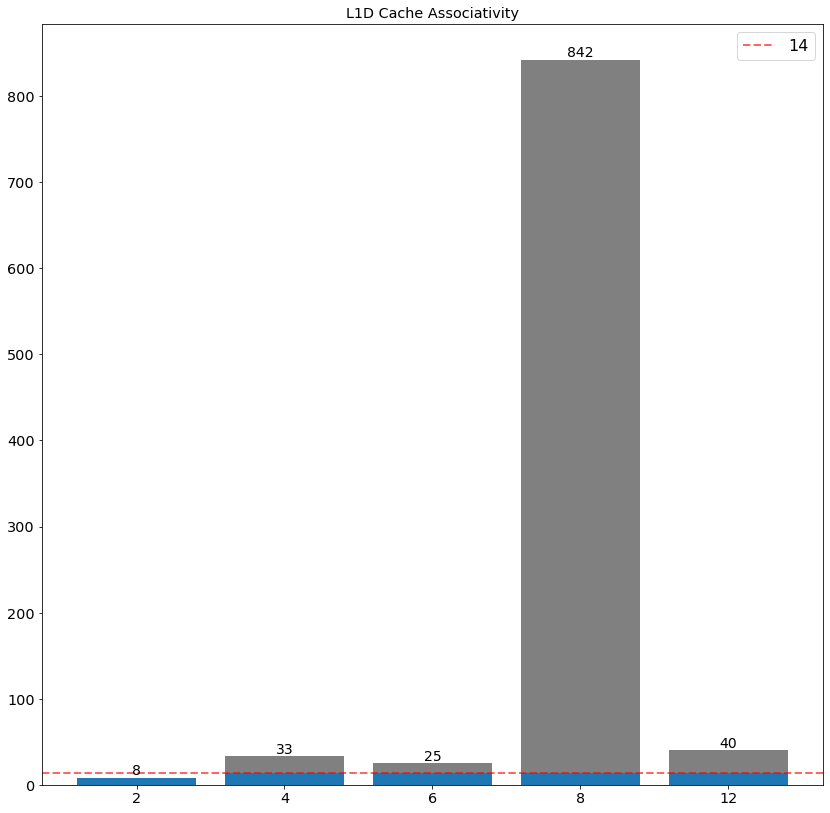

In [9]:
X_l1asso, y_l1asso = prepare_l1asso(balance, db_models, cacheasso_benchmarks, csv_dict['name'], csv_dict['rname'], csv_dict['l1asso'])
threshold = 14

counter = collections.Counter(y_l1asso)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('L1D Cache Associativity')
plt.legend(fontsize=16)
plt.show()

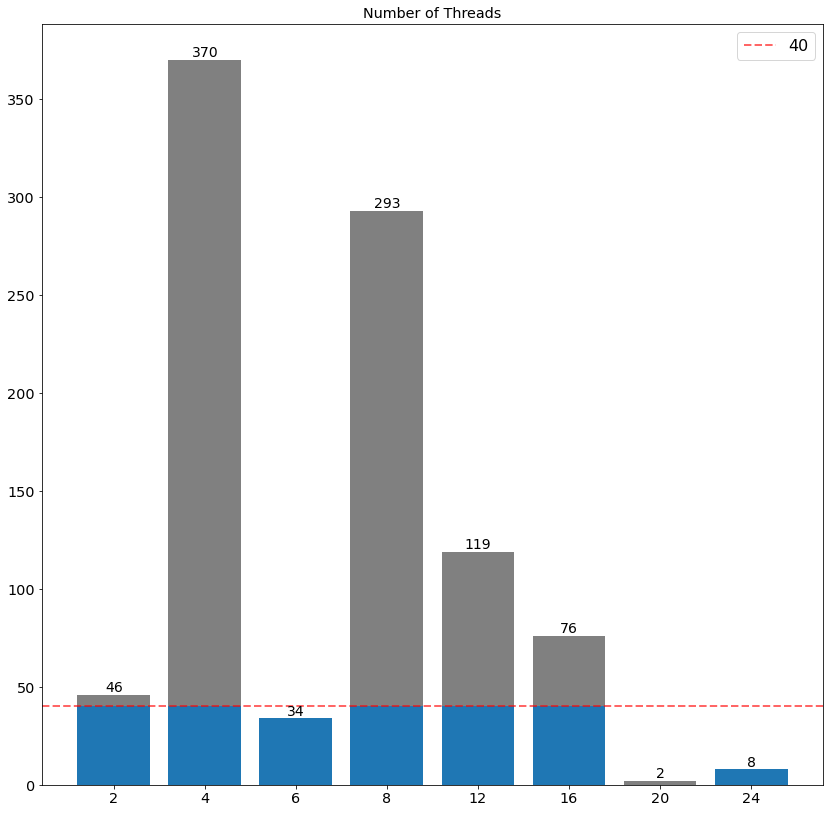

In [10]:
X_threads, y_threads = prepare_threads(balance, db_models, cores, csv_dict['name'], csv_dict['rname'], csv_dict['threads'])
threshold = 40

counter = collections.Counter(y_threads)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'gray'])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Number of Threads')
plt.legend(fontsize=16)
plt.show()

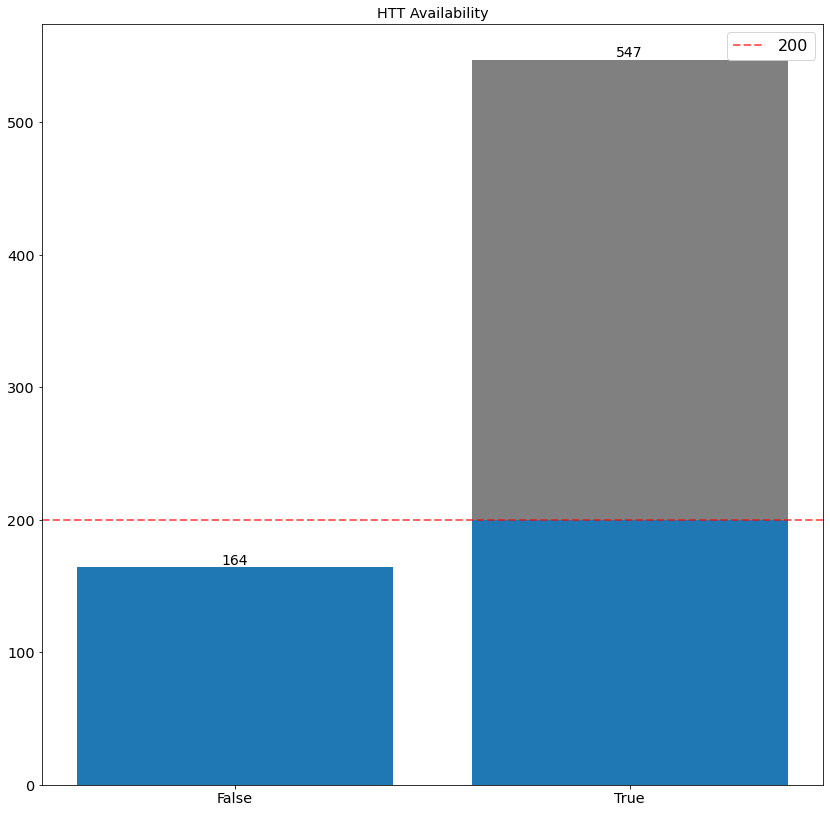

In [11]:
X_htt, y_htt = prepare_htt(balance, db_models, cores, csv_dict['name'], csv_dict['rname'], csv_dict['smt'])
threshold = 200

counter = collections.Counter(y_htt)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('HTT Availability')
plt.legend(fontsize=16)
plt.show()

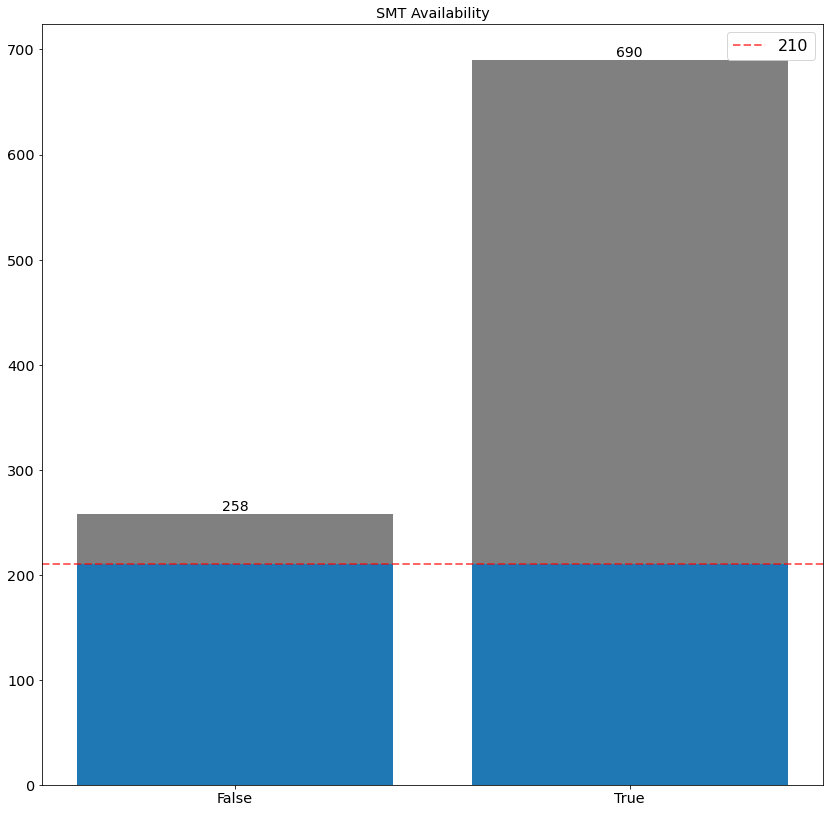

In [12]:
X_smt, y_smt = prepare_smt(balance, db_models, cores, csv_dict['name'], csv_dict['rname'], csv_dict['smt'])
threshold = 210

counter = collections.Counter(y_smt)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('SMT Availability')
plt.legend(fontsize=16)
plt.show()

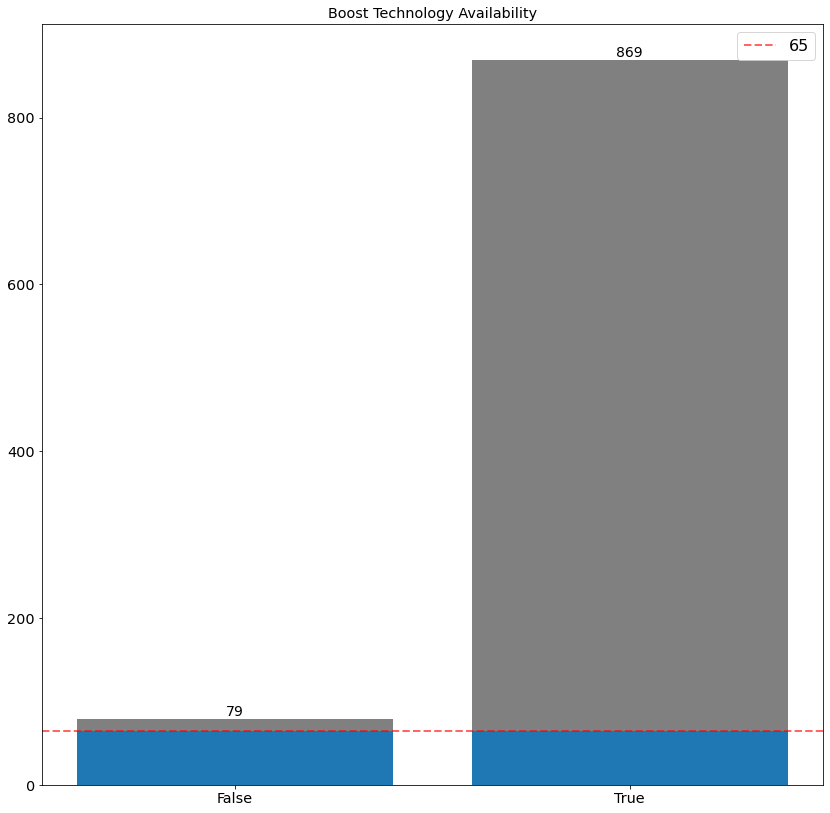

In [13]:
X_boosttech, y_boosttech = prepare_boosttech(balance, db_models, singleperf_benchmarks, csv_dict['name'], csv_dict['rname'], csv_dict['base'], csv_dict['boost'])
threshold = 65

counter = collections.Counter(y_boosttech)
items = sorted(list(counter.items()), key=lambda tup: tup[0])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Boost Technology Availability')
plt.legend(fontsize=16)
plt.show()

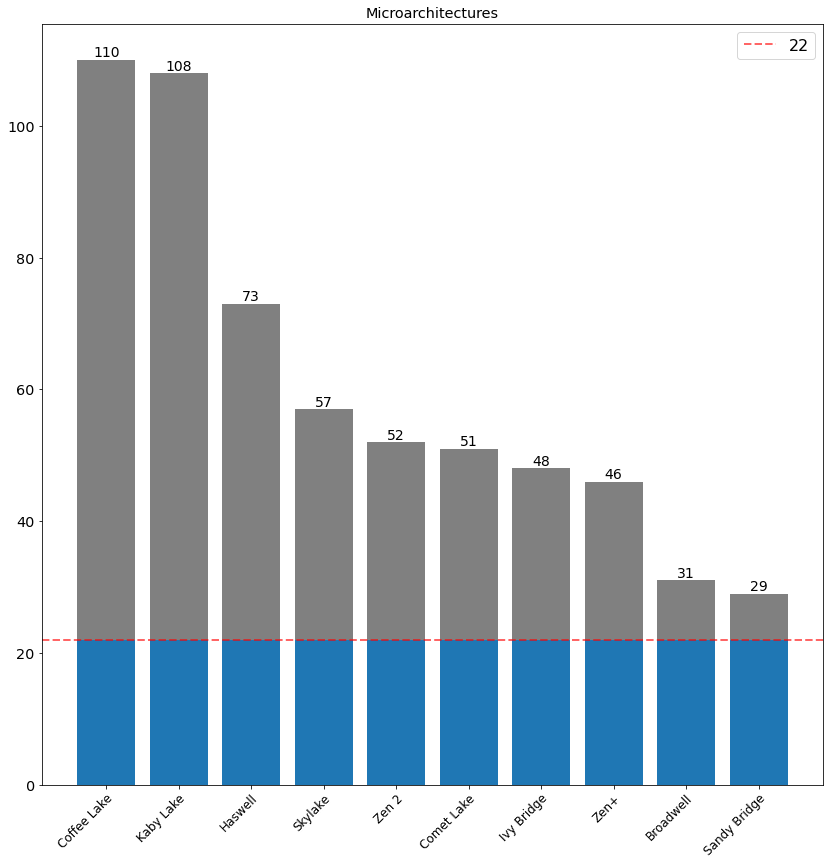

In [14]:
X_uarch, y_uarch = prepare_uarch(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, cacheasso_benchmarks, cores, csv_dict['name'], csv_dict['rname'], csv_dict['uarch'])
threshold = 22

counter = collections.Counter(y_uarch)
items = sorted(list(counter.items()), key=lambda tup: tup[1], reverse=True)
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0' for i in range (10)] + ['gray' for i in range(9)])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Microarchitectures')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.tick_params(axis='x', which='major', labelsize=12)
plt.legend(fontsize=16)
plt.show()

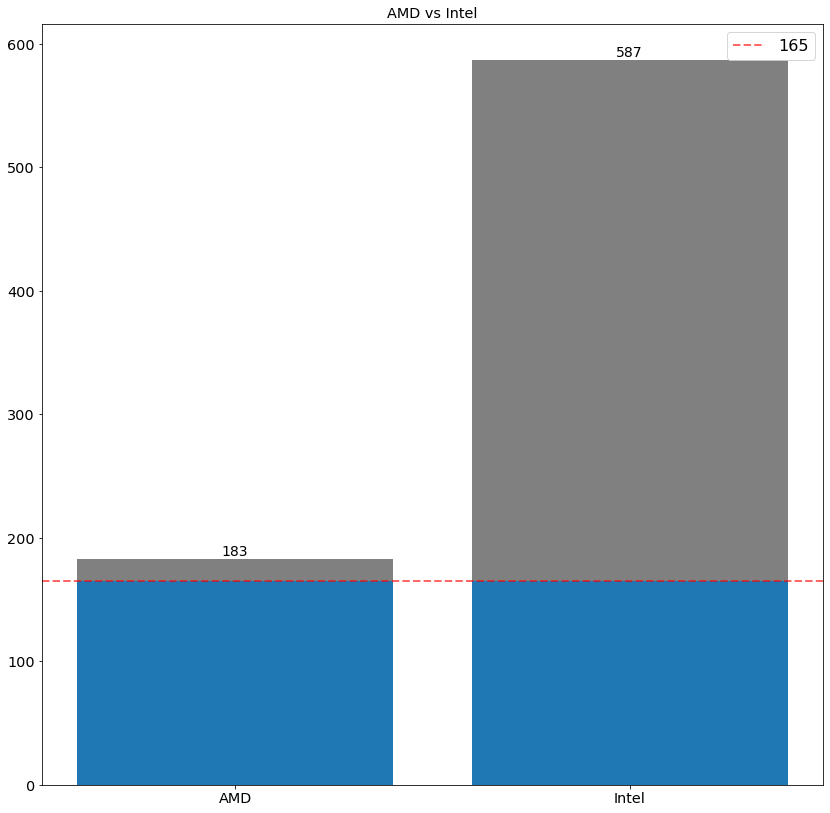

In [15]:
X_vendor, y_vendor = prepare_vendor(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, csv_dict['name'], csv_dict['rname'])
threshold = 165

counter = collections.Counter(y_vendor).most_common(2)
items = sorted(list(counter), key=lambda tup: tup[1])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('AMD vs Intel')
plt.legend(fontsize=16)
plt.show()

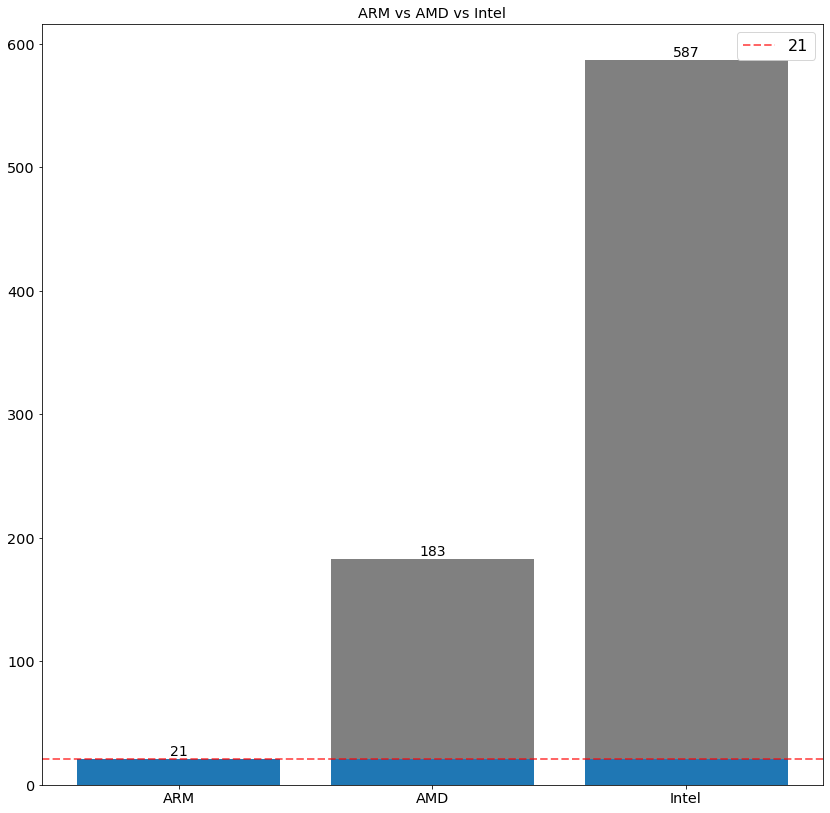

In [16]:
X_vendor_all, y_vendor_all = prepare_vendor_all(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, csv_dict['name'], csv_dict['rname'])
threshold = 21

counter = collections.Counter(y_vendor_all)
items = sorted(list(counter.items()), key=lambda tup: tup[1])
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('ARM vs AMD vs Intel')
plt.legend(fontsize=16)
plt.show()

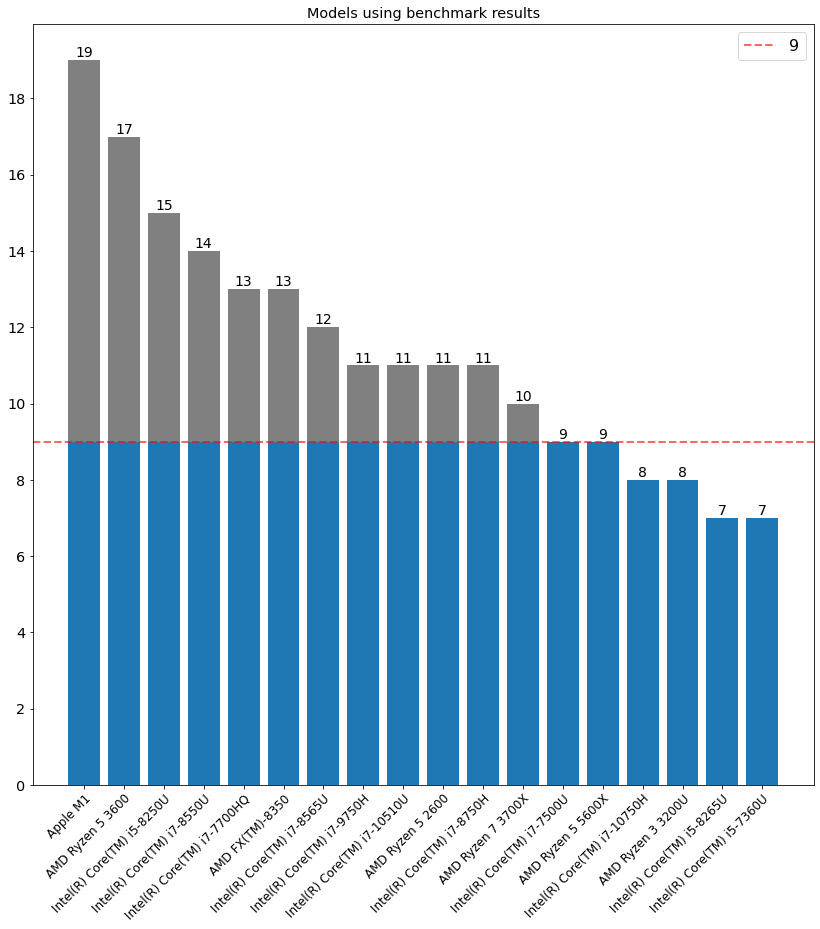

In [17]:
X_model, y_model = prepare_model(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, cacheasso_benchmarks, cores, csv_dict['name'], csv_dict['rname'])
threshold = 9

counter = collections.Counter(y_model)
items = sorted(list(counter.items()), key=lambda tup: tup[1], reverse=True)
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0' for i in range (18)] + ['gray'])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Models using benchmark results')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.tick_params(axis='x', which='major', labelsize=12)
plt.yticks([i for i in range(0, 20, 2)])
plt.legend(fontsize=16)
plt.show()

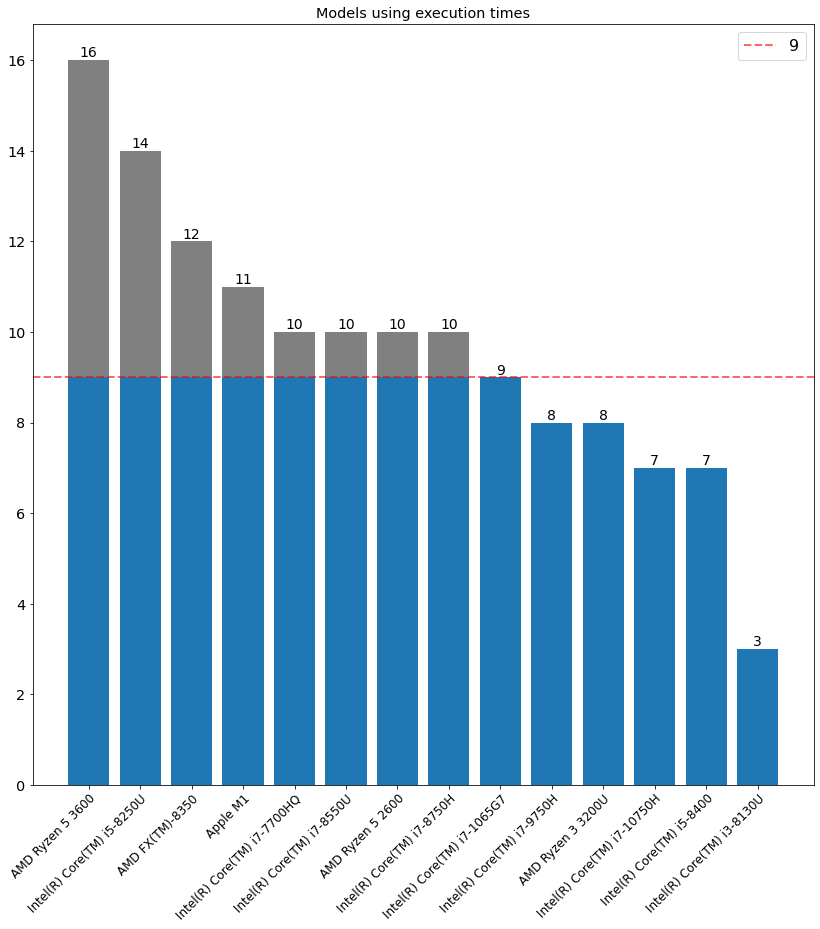

In [18]:
X_model_all, y_model_all = prepare_model_all(balance, db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, cacheasso_benchmarks, cores, execution_times, csv_dict['name'], csv_dict['rname'])

counter = collections.Counter(y_model_all)
items = sorted(list(counter.items()), key=lambda tup: tup[1], reverse=True)
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0' for i in range (14)] + ['gray' for i in range(5)])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Models using execution times')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.tick_params(axis='x', which='major', labelsize=12)
plt.legend(fontsize=16)
plt.show()

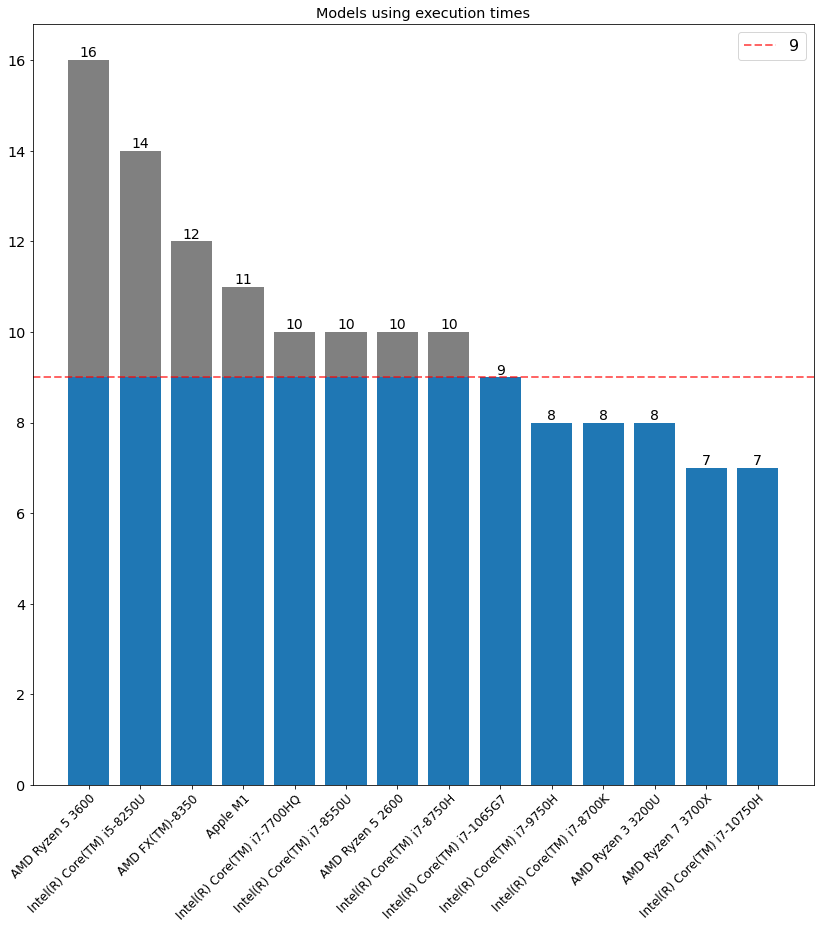

In [19]:
X_othermodel_execution, y_othermodel_execution = prepare_model_execution(balance, db_models, execution_times, cachesize_benchmarks_large, csv_dict['name'], csv_dict['rname'])

counter = collections.Counter(y_othermodel_execution)
items = sorted(list(counter.items()), key=lambda tup: tup[1], reverse=True)
items = [list(t) for t in zip(*items)]
fig, ax = plt.subplots(figsize=(14, 14))
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: min(x, threshold), items[1])), color=['C0' for i in range (14)] + ['gray' for i in range(5)])
ax.bar(list(map(lambda x: str(x), items[0])), list(map(lambda x: max(0, x - threshold), items[1])), bottom=list(map(lambda x: min(x, threshold), items[1])), color='gray')
# ax.bar(list(map(lambda x: str(x), items[0])), items[1], color=['C0', 'C0', 'C0', 'C0', 'gray', 'C0'])
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, alpha=0.6, label=str(threshold))
ax.bar_label(ax.containers[1], items[1], fontsize=14)
ax.set_title('Models using execution times')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.tick_params(axis='x', which='major', labelsize=12)
plt.legend(fontsize=16)
plt.show()

In [20]:
X_intelvintel, y_intelvintel = prepare_cpuvscpu(False, 'Intel(R) Core(TM) i5-8250U', 'Intel(R) Core(TM) i7-8550U', db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, cacheasso_benchmarks, cores, csv_dict['name'], csv_dict['rname'])

In [21]:
collections.Counter(y_intelvintel)

Counter({'Intel(R) Core(TM) i7-8550U': 14, 'Intel(R) Core(TM) i5-8250U': 15})

In [22]:
X_amdvamd, y_amdvamd = prepare_cpuvscpu(False, 'AMD Ryzen 5 2600', 'AMD Ryzen 5 3600', db_models, cachesize_benchmarks_small, cachesize_benchmarks_large, tlb_benchmarks, cacheasso_benchmarks, cores, csv_dict['name'], csv_dict['rname'])

In [23]:
collections.Counter(y_amdvamd)

Counter({'AMD Ryzen 5 3600': 17, 'AMD Ryzen 5 2600': 11})

In [24]:
import numpy
from functools import reduce

In [25]:
def removeOutliers(x, outlierConstant=2):
    a = numpy.array(x)
    upper_quartile = numpy.percentile(a, 75)
    lower_quartile = numpy.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

In [26]:
pagesize_times = [] # 0
prefetcher_times = [] # 1
cacheasso_times = []# 2
cachesize_times = [] # 3 + 4
tlbsize_times = [] # 5
loadbuffer_times = [] # 9
singleperf_times = [] # 10
cores_times = [] # 12
for i, times in enumerate(execution_times):
    if times != [] and len(cachesize_benchmarks_large[i]) > 1 and len(times) == 13:
        pagesize_times += [times[0]] # 0
        prefetcher_times += [times[1]] # 1
        cacheasso_times += [times[2]]# 2
        cachesize_times += [times[3] + times[4]] # 3 + 4
        tlbsize_times += [times[5]] # 5
        loadbuffer_times += [times[9]] # 9
        singleperf_times += [times[10]] # 10
        cores_times += [times[12]] # 12

In [27]:
pagesize_times_filtered = removeOutliers(pagesize_times)
prefetcher_times_filtered = removeOutliers(prefetcher_times)
cacheasso_times_filtered = removeOutliers(cacheasso_times)
cachesize_times_filtered = removeOutliers(cachesize_times)
tlbsize_times_filtered = removeOutliers(tlbsize_times)
loadbuffer_times_filtered = removeOutliers(loadbuffer_times)
singleperf_times_filtered = removeOutliers(singleperf_times)
cores_times_filtered = removeOutliers(cores_times)

In [28]:
print(numpy.mean(pagesize_times))
print(numpy.min(pagesize_times))
print(numpy.min(pagesize_times_filtered))
print(numpy.max(pagesize_times))
print(numpy.max(pagesize_times_filtered))
print(numpy.percentile(pagesize_times, 25))
print(numpy.percentile(pagesize_times, 75))

6.497228260869564
1.31
1.31
372.59
14.49
2.81
6.737500000000001


In [29]:
print(numpy.mean(prefetcher_times))
print(numpy.min(prefetcher_times))
print(numpy.min(prefetcher_times_filtered))
print(numpy.max(prefetcher_times))
print(numpy.max(prefetcher_times_filtered))
print(numpy.percentile(prefetcher_times, 25))
print(numpy.percentile(prefetcher_times, 75))

0.397133152173913
0.04
0.04
3.93
0.78
0.27
0.44


In [30]:
print(numpy.mean(cacheasso_times))
print(numpy.min(cacheasso_times))
print(numpy.min(cacheasso_times_filtered))
print(numpy.max(cacheasso_times))
print(numpy.max(cacheasso_times_filtered))
print(numpy.percentile(cacheasso_times, 25))
print(numpy.percentile(cacheasso_times, 75))

23.203179347826087
10.62
10.62
143.43
43.64
17.557499999999997
26.295


In [31]:
print(numpy.mean(cachesize_times))
print(numpy.min(cachesize_times))
print(numpy.min(cachesize_times_filtered))
print(numpy.max(cachesize_times))
print(numpy.max(cachesize_times_filtered))
print(numpy.percentile(cachesize_times, 25))
print(numpy.percentile(cachesize_times, 75))

153.1080163043478
50.64
50.64
703.56
286.92
109.47
168.745


In [32]:
print(numpy.mean(tlbsize_times))
print(numpy.min(tlbsize_times))
print(numpy.min(tlbsize_times_filtered))
print(numpy.max(tlbsize_times))
print(numpy.max(tlbsize_times_filtered))
print(numpy.percentile(tlbsize_times, 25))
print(numpy.percentile(tlbsize_times, 75))

9.609551630434783
2.43
2.43
63.36
18.52
6.9575
11.085


In [33]:
print(numpy.mean(loadbuffer_times))
print(numpy.min(loadbuffer_times))
print(numpy.min(loadbuffer_times_filtered))
print(numpy.max(loadbuffer_times))
print(numpy.max(loadbuffer_times_filtered))
print(numpy.percentile(loadbuffer_times, 25))
print(numpy.percentile(loadbuffer_times, 75))

25.98366847826087
6.26
6.26
199.51
53.8
15.58
28.505


In [34]:
print(numpy.mean(singleperf_times))
print(numpy.min(singleperf_times))
print(numpy.min(singleperf_times_filtered))
print(numpy.max(singleperf_times))
print(numpy.max(singleperf_times_filtered))
print(numpy.percentile(singleperf_times, 25))
print(numpy.percentile(singleperf_times, 75))

1.7712092391304346
1.7
1.7
3.89
1.81
1.72
1.75


In [35]:
print(numpy.mean(cores_times))
print(numpy.min(cores_times))
print(numpy.min(cores_times_filtered))
print(numpy.max(cores_times))
print(numpy.max(cores_times_filtered))
print(numpy.percentile(cores_times, 25))
print(numpy.percentile(cores_times, 75))

22.91807065217391
2.8
2.8
268.58
63.54
10.3
28.7125
